In [2]:
import pandas as pd
import numpy as np
from pydataset import data

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


pd.set_option("display.max_columns", None)

year_x  duration_x   budget_x  LANGUAGE_English_x  LANGUAGE_Chinese_x  \
3651    2016         114   40000000                   1                   0   
7437    2017         105    6400000                   1                   0   
5805    2019          77    2500000                   1                   0   
3381    2016         102   10000000                   1                   0   
4743    2016         109   13000000                   1                   0   
...      ...         ...        ...                 ...                 ...   
5512    2016         113  170000000                   1                   0   
9444    2018         140   69000000                   1                   0   
9116    2017         115   15000000                   1                   0   
2927    2020         124   90000000                   1                   0   
8678    2017         124  100000000                   1                   1   

      LANGUAGE_Korean_x  PC_Marvel Studios_x  PC_Columbia Pictures_x  \
3651                  0                    0                       0   
7437                  0                    0                       0   
5805                  0                    0                       0   
3381                  0                    0                       0   
4743                  0                    0                       1   
...                 ...                  ...                     ...   
5512                  0                    0                       0   
9444                  0                    0                       0   
9116                  0                    0                       0   
2927                  0                    0                       1   
8678                  0                    0                       0   

      PC_Universal Pictures_x  PC_Warner Bros_x  PC_Twentieth Century Fox_x  \
3651                        0                 0                           0   
7437                        0                 0                           0   
5805                        0                 0                           0   
3381                        0                 0                           0   
4743                        0                 0                           0   
...                       ...               ...                         ...   
5512                        0                 0                           0   
9444                        0                 0                           0   
9116                        0                 0                           0   
2927                        0                 0                           0   
8678                        0                 0                           0   

      PC_Walt Disney Pictures_x  autumn_x  spring_x  summer_x  winter_x  \
3651                          0         1         0         0         0   
7437                          0         0         0         1         0   
5805                          0         0         0         1         0   
3381                          0         0         0         1         0   
4743                          0         0         1         0         0   
...                         ...       ...       ...       ...       ...   
5512                          1         0         0         1         0   
9444                          0         0         1         0         0   
9116                          0         0         1         0         0   
2927                          0         0         1         0         0   
8678                          0         0         1         0         0   

      GENRE_Action_x  GENRE_Adventure_x  GENRE_Animation_x  GENRE_Biography_x  \
3651               0                  0                  0                  1   
7437               0                  0                  0                  1   
5805               0                  0                  0                  0   
3381              

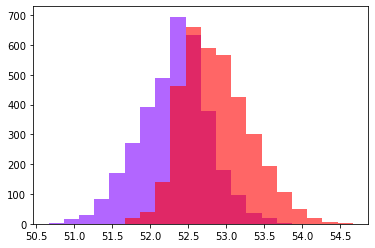

In [3]:
from fomlads.data.external import import_for_classification

from fomlads.model.classification import project_data
from fomlads.model.classification import maximum_separation_projection

from fomlads.plot.exploratory import plot_scatter_array_classes
from fomlads.plot.exploratory import plot_class_histograms
from fomlads.model.classification import fisher_linear_discriminant_projection


# I wrote the get_fisher_histogram function to avoid repeated code
# fisher_linear_discriminant_projection, project_data, and plot_class_histograms are all from fomlads
def get_fisher_histogram(inputs, targets):
    w = fisher_linear_discriminant_projection(inputs, targets)
    projected_inputs = project_data(inputs, w)
    ax = plot_class_histograms(projected_inputs, targets)
    

#######################################################################
# Iris data from tutorial, just to check if fisher model is working.

# ifname = 'iris.data'

# # reimport data, just 2 classes
# classes = ["Iris-setosa", "Iris-versicolor"]
# inputs, targets, field_names, classes = import_for_classification(
#     ifname, classes=classes)

# get_fisher_histogram(inputs, targets)


#####################################################################
# Our dataset

df = pd.read_csv("profit_x_y.csv")
df = df.drop("Unnamed: 0", axis =1 )


df = df.drop("title_x", axis = 1)
df = df.drop("title_y", axis = 1)
df = df.drop("profit_x", axis = 1)
df = df.drop("profit_y", axis = 1)

# Had to remove gross income since it can be used with budget to directly get profit,
# and an unreleased movie will not have a known income.

df = df.drop("worlwide_gross_income_x", axis = 1)
df = df.drop("worlwide_gross_income_y", axis = 1)

# Using a filter such as this one (or action movies only etc.) gives an error 
# about a singular matrix when calculating the weights. I'm not sure what's causing it.

# df = df[df["LANGUAGE_English_x"] == 1]

x_train, x_test, y_train, y_test = train_test_split(df.drop("profit_xy", axis = 1), df["profit_xy"])


x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

get_fisher_histogram(x_train, y_train)

C:\Users\subha\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


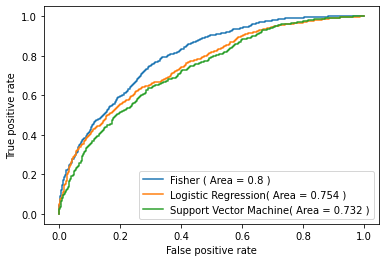

In [4]:
# Using sklearn, compares fishers model (LinearDiscriminantAnalysis), logistic regression and support vector machine (LinearSVC).

# Creats and fits models to traning data
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

svm = LinearSVC()
svm.fit(x_train, y_train)


# Makes predictions on using data
y_pred_lda = lda.decision_function(x_test)
y_pred_logistic = log_reg.decision_function(x_test)
y_pred_svm = svm.decision_function(x_test)


# Gets the ROC curves for each model
# Using the "score" method is not a good metric since guessing "1" everytime will still give a score of ~50%. 

# fpr -> Fale Positive Rate
# tpr -> True Positive Rate
# Can ignore threhsold, I only included it beacuse the YouTube tutorial had it.
fpr_lda, tpr_lda, threshold_lda = roc_curve(y_test, y_pred_lda)
fpr_logistic, tpr_logistic, threshold_logistic = roc_curve(y_test, y_pred_logistic)
fpr_svm, tpr_svm, threshold_svm = roc_curve(y_test, y_pred_svm)

# Caclulates the area under the ROC curve for each of the models/
auc_lda = auc(fpr_lda, tpr_lda)
auc_logistic = auc(fpr_logistic, tpr_logistic)
auc_svm = auc(fpr_svm, tpr_svm)


# Plots the ROC curves.
plt.figure()
plt.plot(fpr_lda, tpr_lda, label = f"Fisher ( Area = {round(auc_lda,3)} )")
plt.plot(fpr_logistic, tpr_logistic, label = f"Logistic Regression( Area = {round(auc_logistic,3)} )")
plt.plot(fpr_svm, tpr_svm, label = f"Support Vector Machine( Area = {round(auc_svm,3)} )")

plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

plt.legend()
plt.show()




In [4]:
# df = pd.read_csv("profit_x_y.csv")
# df = df.drop("Unnamed: 0", axis =1 )

# display(df)

# df = df.drop("title_x", axis = 1)
# df = df.drop("title_y", axis = 1)
# df = df.drop("profit_x", axis = 1)
# df = df.drop("profit_y", axis = 1)
# df = df.drop("worlwide_gross_income_x", axis = 1)
# df = df.drop("worlwide_gross_income_y", axis = 1)

# x_train, x_test, y_train, y_test = train_test_split(df.drop("profit_xy", axis = 1), df["profit_xy"], test_size = 0.4, train_size = 0.6)
# LDA_model = LinearDiscriminantAnalysis()
# LDA_model.fit(x_train, y_train)
# # LDA_model.score(x_test, y_test)